In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import json
import os
import glob

# BERT

In [2]:
with open('run-metrics-0.json', 'r') as f:
    data0 = json.load(f)
print(data0)

{'variance_metrics': {'full_set_var_sum': 0.8273158669471741, 'full_set_var_values': [0.03758762404322624, 0.027573062106966972, 0.024978816509246826, 0.020999064669013023, 0.018665092065930367, 0.018193764612078667, 0.017559770494699478, 0.01580890826880932, 0.014912009239196777, 0.014187040738761425, 0.01373816654086113, 0.013499109074473381, 0.013167764991521835, 0.012632912956178188, 0.01250414364039898, 0.012140489183366299, 0.011813382618129253, 0.011259052902460098, 0.011059960350394249, 0.010905507951974869, 0.010687979869544506, 0.010450232774019241, 0.010327716358006, 0.010246943682432175, 0.01000424474477768, 0.009881374426186085, 0.009806287474930286, 0.009597361087799072, 0.00946110486984253, 0.009151218459010124, 0.00902189314365387, 0.008814840577542782, 0.008747960440814495, 0.008643455803394318, 0.008591623976826668, 0.008335023187100887, 0.008147881366312504, 0.008089794777333736, 0.00794473197311163, 0.007857290096580982, 0.007682186551392078, 0.00763098057359457, 0.

In [3]:
with open('run-metrics-1.json', 'r') as f:
    data1 = json.load(f)
print(data1)

{'variance_metrics': {'full_set_var_sum': 0.8272321224212646, 'full_set_var_values': [0.03785114735364914, 0.027753446251153946, 0.026331881061196327, 0.020453862845897675, 0.018432287499308586, 0.017495665699243546, 0.01684897392988205, 0.01654154434800148, 0.014519870281219482, 0.014391127042472363, 0.013626087456941605, 0.013582244515419006, 0.013094475492835045, 0.012809009291231632, 0.01234376709908247, 0.01175033301115036, 0.011490045115351677, 0.011467637494206429, 0.011329497210681438, 0.011046129278838634, 0.01095571368932724, 0.01077057234942913, 0.010487571358680725, 0.01037607528269291, 0.010148406960070133, 0.009945183992385864, 0.009769992902874947, 0.009668284095823765, 0.009561493992805481, 0.009320448152720928, 0.009167121723294258, 0.008977489545941353, 0.008744260296225548, 0.008673643693327904, 0.008538919501006603, 0.008426900953054428, 0.008257816545665264, 0.008118607103824615, 0.00802086852490902, 0.007907329127192497, 0.007787455804646015, 0.007712331134825945,

In [4]:
with open('run-metrics-2.json', 'r') as f:
    data2 = json.load(f)
print(data2)

{'variance_metrics': {'full_set_var_sum': 0.8257007002830505, 'full_set_var_values': [0.04132744297385216, 0.027347607538104057, 0.026457684114575386, 0.02002277411520481, 0.01816338114440441, 0.017449703067541122, 0.017050456255674362, 0.015836801379919052, 0.0143128065392375, 0.01400376670062542, 0.013680859468877316, 0.013072177767753601, 0.01304136123508215, 0.01276189275085926, 0.012327875941991806, 0.011756451800465584, 0.011665407568216324, 0.01149341557174921, 0.011223587207496166, 0.011029587127268314, 0.010940046980977058, 0.010761147364974022, 0.010177411139011383, 0.009994499385356903, 0.009906060062348843, 0.009770452976226807, 0.009526409208774567, 0.009434827603399754, 0.009337502531707287, 0.009267082437872887, 0.009224168956279755, 0.008890028111636639, 0.008823636919260025, 0.00863499566912651, 0.008476220071315765, 0.00829070433974266, 0.008271932601928711, 0.008011190220713615, 0.007859512232244015, 0.00776497321203351, 0.007630320265889168, 0.007508814334869385, 0.

In [5]:
variance_metrics0 = data0['variance_metrics']
modelling_metrics0 = data0['modelling_metrics']

variance_metrics1 = data1['variance_metrics']
modelling_metrics1 = data1['modelling_metrics']

variance_metrics2 = data2['variance_metrics']
modelling_metrics2 = data2['modelling_metrics']

subset_sizes = modelling_metrics0['subset_size']

In [6]:
def get_key(filename):
    return filename.split('/')[2].split('-')[2].split('.')[0].lower()

In [7]:
file_list = glob.glob('./Eval-Results-bert-base-uncased/*')

odd_results = {}
for file in file_list:
    key = get_key(file)
    with open(file, 'r') as f:
        data = f.read()
        odd_results[key] = data
        # process the data as needed


In [8]:
results = {}

In [9]:
results['subset_size'] = subset_sizes
results['r2_value0'] = variance_metrics0['r2_values']
results['r2_value1'] = variance_metrics1['r2_values']
results['r2_value2'] = variance_metrics2['r2_values']
results['test_accuracy'] = modelling_metrics0['test_accuracies']
results['test_loss'] = modelling_metrics0['test_losses']

In [10]:
for key, values in odd_results.items():
    values = json.loads(values)
    metrics = values['evaluation_metrics']
    losses = []
    accuracies = []
    for metric in metrics:
        loss = metric['eval_loss']
        acc = metric['eval_accuracy']
        losses.append(loss)
        accuracies.append(acc)

    results[f"{key}_loss"] = losses
    results[f"{key}_accuracy"] = accuracies

In [11]:
results_df = pd.DataFrame(results)
results_df

,subset_size,r2_value0,r2_value1,r2_value2,test_accuracy,test_loss,mnli_loss,mnli_accuracy,snli_loss,snli_accuracy,sick_loss,sick_accuracy
0,9041,0.819298,0.820653,0.815277,0.416667,1.193128,0.820688,0.636391,0.921047,0.565045,1.228577,0.387485
1,18082,0.824310,0.824615,0.821018,0.426667,1.333256,0.829892,0.638222,0.991642,0.564841,1.687911,0.394211
2,27123,0.825828,0.826087,0.822981,0.462500,1.498450,0.833731,0.667209,0.988124,0.610138,1.517912,0.457807
3,36164,0.826674,0.826481,0.824090,0.449167,1.524517,0.795374,0.683483,1.059016,0.615941,1.900651,0.399103
4,45205,0.826954,0.826965,0.824908,0.460833,1.480241,0.848412,0.669040,1.064776,0.589882,2.007649,0.368325
5,54246,0.827622,0.826957,0.825292,0.445000,1.224576,0.690768,0.707486,0.865907,0.624695,1.607738,0.369955
6,63287,0.827875,0.827533,0.825461,0.462500,1.627076,0.802235,0.706469,1.080867,0.612785,2.008528,0.435181
7,72328,0.827774,0.827287,0.825762,0.456667,1.288181,0.699370,0.715114,0.884205,0.617162,1.617247,0.439054
8,81369,0.828104,0.827445,0.825753,0.445000,1.284090,0.714076,0.701282,0.858824,0.624695,1.535566,0.421117
9,90410,0.828114,0.827689,0.825990,0.450833,1.505077,0.768434,0.712063,0.943679,0.644544,1.693397,0.483693


In [12]:
results_df['mean_odd_accuracy'] = results_df[['snli_accuracy', 'mnli_accuracy', 'sick_accuracy']].mean(axis=1)
results_df['mean_odd_loss'] = results_df[['snli_loss', 'mnli_loss', 'sick_loss']].mean(axis=1)
results_df['r2_value'] = results_df[['r2_value0', 'r2_value1', 'r2_value2']].mean(axis=1)
results_df

,subset_size,r2_value0,r2_value1,r2_value2,test_accuracy,test_loss,mnli_loss,mnli_accuracy,snli_loss,snli_accuracy,sick_loss,sick_accuracy,mean_odd_accuracy,mean_odd_loss,r2_value
0,9041,0.819298,0.820653,0.815277,0.416667,1.193128,0.820688,0.636391,0.921047,0.565045,1.228577,0.387485,0.529640,0.990104,0.818409
1,18082,0.824310,0.824615,0.821018,0.426667,1.333256,0.829892,0.638222,0.991642,0.564841,1.687911,0.394211,0.532425,1.169815,0.823314
2,27123,0.825828,0.826087,0.822981,0.462500,1.498450,0.833731,0.667209,0.988124,0.610138,1.517912,0.457807,0.578385,1.113256,0.824965
3,36164,0.826674,0.826481,0.824090,0.449167,1.524517,0.795374,0.683483,1.059016,0.615941,1.900651,0.399103,0.566175,1.251681,0.825748
4,45205,0.826954,0.826965,0.824908,0.460833,1.480241,0.848412,0.669040,1.064776,0.589882,2.007649,0.368325,0.542415,1.306946,0.826276
5,54246,0.827622,0.826957,0.825292,0.445000,1.224576,0.690768,0.707486,0.865907,0.624695,1.607738,0.369955,0.567379,1.054804,0.826624
6,63287,0.827875,0.827533,0.825461,0.462500,1.627076,0.802235,0.706469,1.080867,0.612785,2.008528,0.435181,0.584812,1.297210,0.826956
7,72328,0.827774,0.827287,0.825762,0.456667,1.288181,0.699370,0.715114,0.884205,0.617162,1.617247,0.439054,0.590443,1.066941,0.826941
8,81369,0.828104,0.827445,0.825753,0.445000,1.284090,0.714076,0.701282,0.858824,0.624695,1.535566,0.421117,0.582364,1.036156,0.827101
9,90410,0.828114,0.827689,0.825990,0.450833,1.505077,0.768434,0.712063,0.943679,0.644544,1.693397,0.483693,0.613433,1.135170,0.827265


(0.4, 0.6)

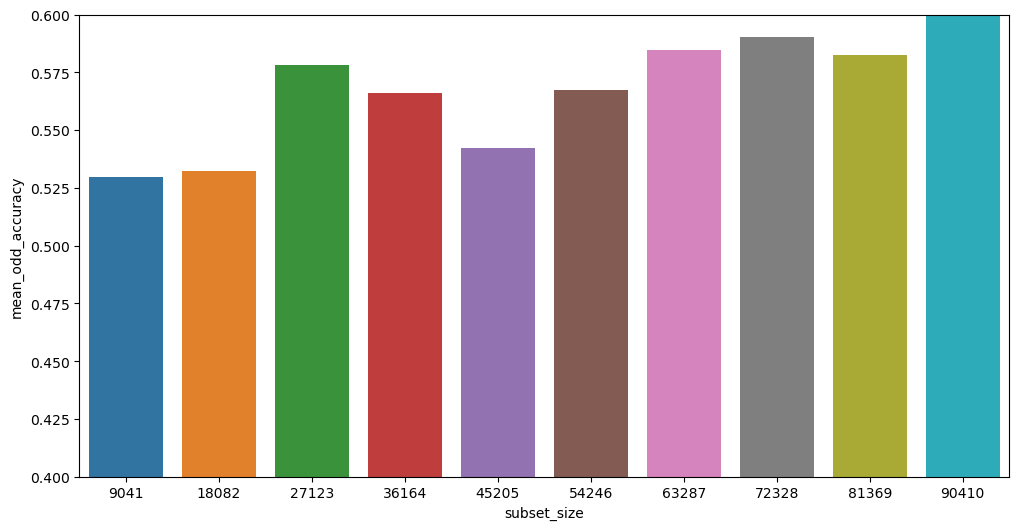

In [13]:
fig, ax = plt.subplots(figsize=(12, 6))
plot = sns.barplot(x=results_df['subset_size'], y=results_df['mean_odd_accuracy'], ax=ax)
plt.ylim(0.4, 0.6)

[(1.2, 1.6)]

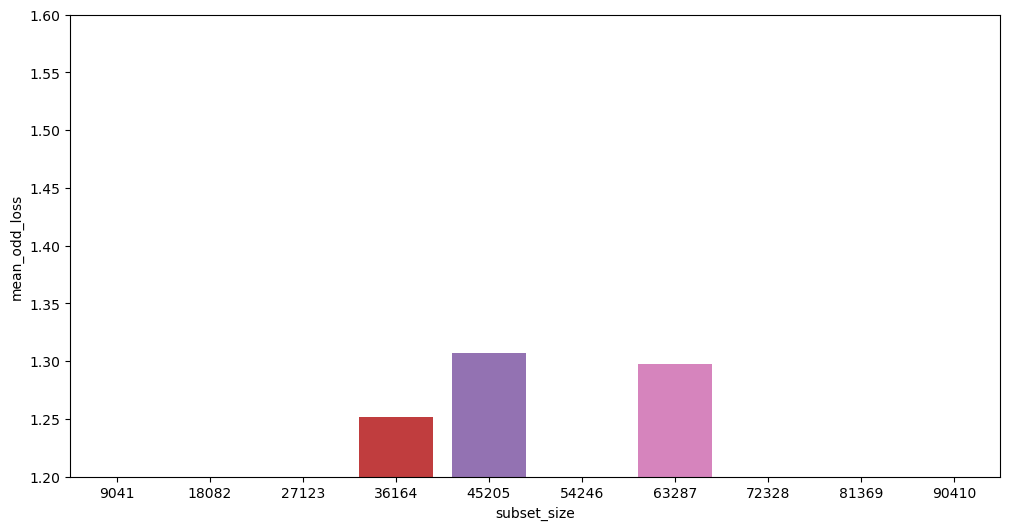

In [14]:
fig, ax = plt.subplots(figsize=(12, 6))
plot = sns.barplot(x=results_df['subset_size'], y=results_df['mean_odd_loss'])
plot.set(ylim=(1.2, 1.6))

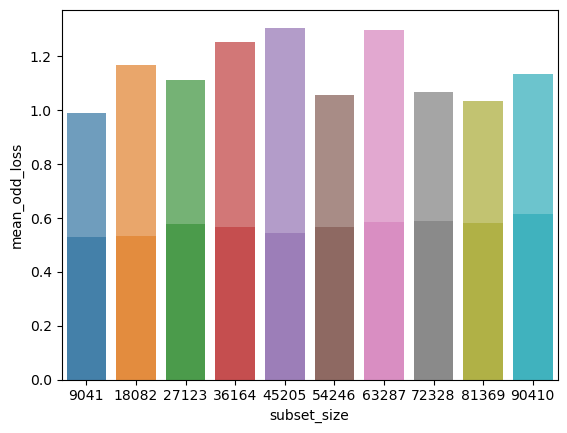

In [15]:
plot = sns.barplot(x=results_df['subset_size'], y=results_df['mean_odd_accuracy'], alpha=0.7)
plot = sns.barplot(x=results_df['subset_size'], y=results_df['mean_odd_loss'], alpha=0.7)

[(0.4, 0.8)]

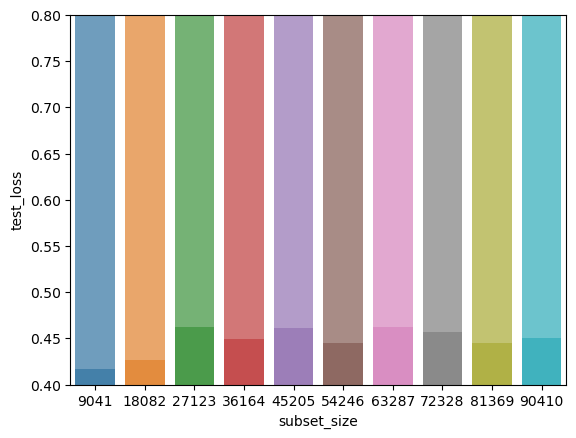

In [16]:
plot = sns.barplot(x=results_df['subset_size'], y=results_df['test_accuracy'], alpha=0.7)
plot = sns.barplot(x=results_df['subset_size'], y=results_df['test_loss'], alpha=0.7)
plot.set(ylim=(0.4, 0.8))

In [17]:
full_set_var_sum = np.mean((variance_metrics0['full_set_var_sum'], variance_metrics1['full_set_var_sum'], variance_metrics2['full_set_var_sum']))

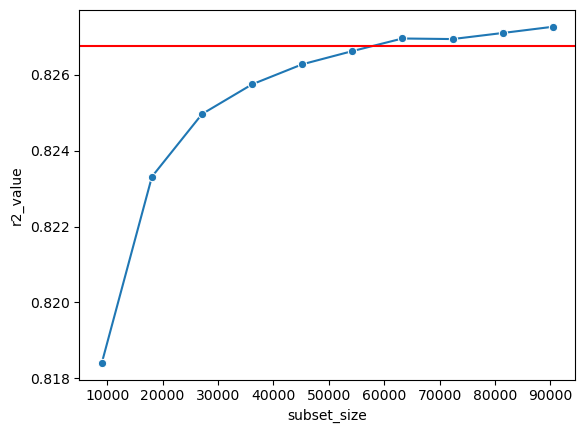

In [18]:
graph = sns.lineplot(x=results_df['subset_size'], y=results_df['r2_value'], marker="o")
graph.axhline(full_set_var_sum, color='red')

In [21]:
def normalize_list(lst):
    min_val = min(lst)
    max_val = max(lst)
    normalized = [(x - min_val) / (max_val - min_val) for x in lst]
    return normalized

<Axes: xlabel='subset_size'>

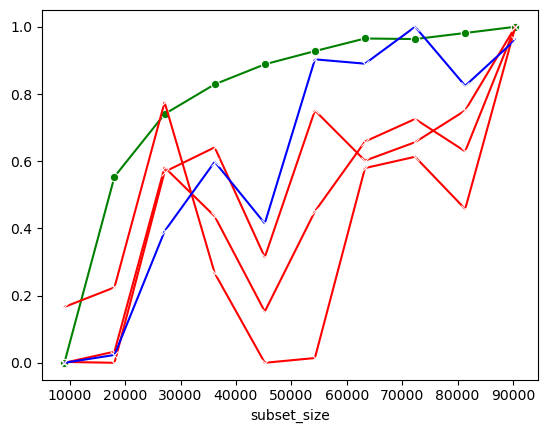

In [22]:
sns.lineplot(x=results_df['subset_size'], y=normalize_list(results_df['r2_value']), marker="o", color='green')
sns.lineplot(x=results_df['subset_size'], y=normalize_list(results_df['mean_odd_accuracy']), marker="x", color='red')
sns.lineplot(x=results_df['subset_size'], y=normalize_list(results_df['snli_accuracy']), marker="x", color='red')
sns.lineplot(x=results_df['subset_size'], y=normalize_list(results_df['sick_accuracy']), marker="x", color='red')
sns.lineplot(x=results_df['subset_size'], y=normalize_list(results_df['mnli_accuracy']), marker="x", color='blue')

<Axes: xlabel='subset_size', ylabel='mnli_accuracy'>

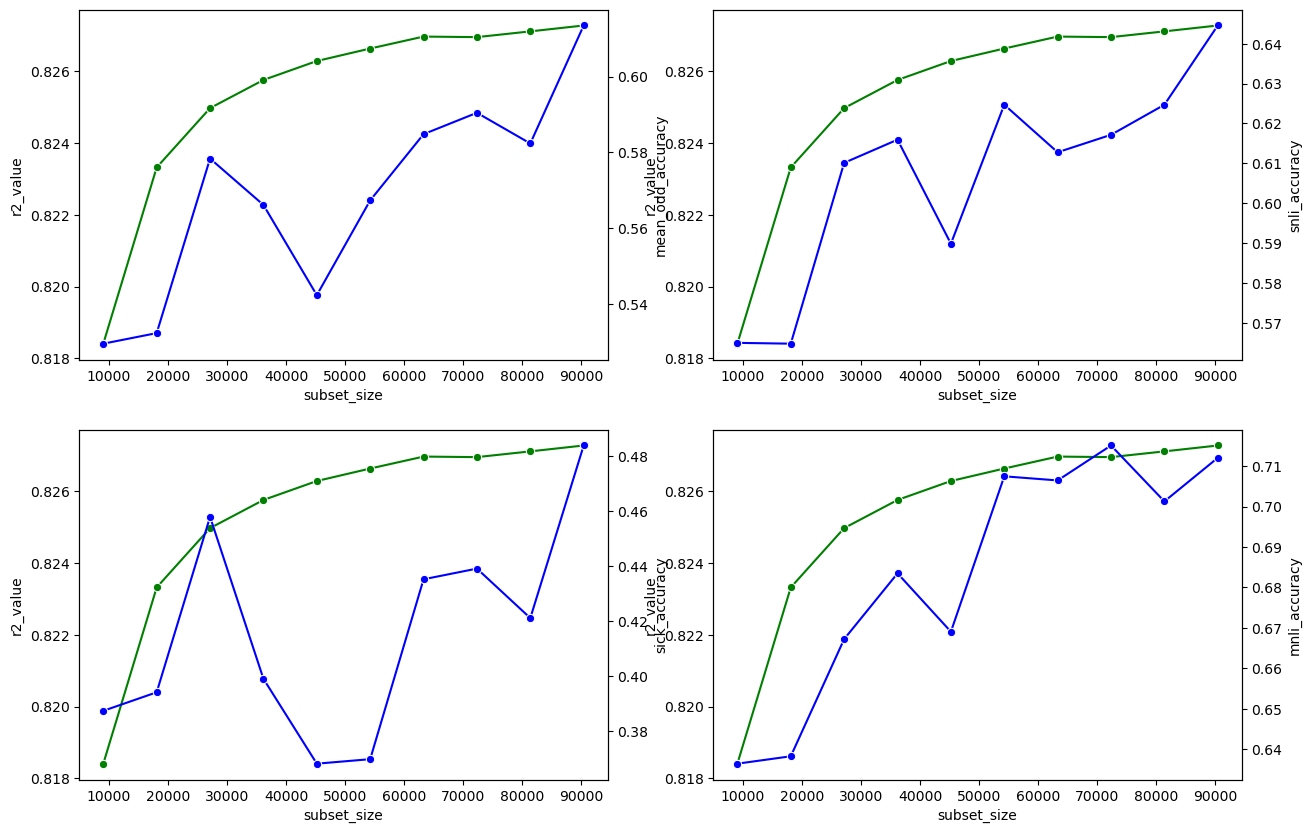

In [23]:
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

sns.lineplot(x=results_df['subset_size'], y=results_df['r2_value'], color="g", ax=axes[0][0], marker="o")
ax1 = axes[0][0].twinx()
sns.lineplot(x=results_df['subset_size'], y=results_df['mean_odd_accuracy'], color="b", ax=ax1, marker="o")

sns.lineplot(x=results_df['subset_size'], y=results_df['r2_value'], color="g", ax=axes[0][1], marker="o")
ax2 = axes[0][1].twinx()
sns.lineplot(x=results_df['subset_size'], y=results_df['snli_accuracy'], color="b", ax=ax2, marker="o")

sns.lineplot(x=results_df['subset_size'], y=results_df['r2_value'], color="g", ax=axes[1][0], marker="o")
ax3 = axes[1][0].twinx()
sns.lineplot(x=results_df['subset_size'], y=results_df['sick_accuracy'], color="b", ax=ax3, marker="o")

sns.lineplot(x=results_df['subset_size'], y=results_df['r2_value'], color="g", ax=axes[1][1], marker="o")
ax4 = axes[1][1].twinx()
sns.lineplot(x=results_df['subset_size'], y=results_df['mnli_accuracy'], color="b", ax=ax4, marker="o")